In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

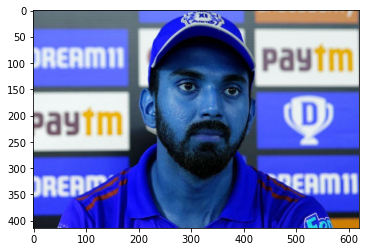

In [4]:
original_image = cv2.imread('./test_images/rahul1.gif')
plt.imshow(original_image)

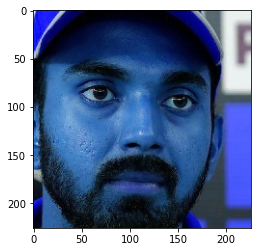

In [5]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/rahul1.gif')
plt.imshow(cropped_image)

In [6]:
path_to_data='./dataset/'
path_to_cr_data='./dataset/cropped/'

In [7]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [8]:
img_dirs

['./dataset/bhuvneshwar_kumar',
 './dataset/cropped',
 './dataset/hardik_pandya',
 './dataset/jasprit_bumrah',
 './dataset/kl_rahul',
 './dataset/ravindra_jadeja',
 './dataset/rishabh_pant',
 './dataset/rohit_sharma',
 './dataset/shardul_thakur',
 './dataset/virat_kohli']

In [9]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [10]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

bhuvneshwar_kumar
Generating cropped images in folder:  ./dataset/cropped/bhuvneshwar_kumar
cropped
hardik_pandya
Generating cropped images in folder:  ./dataset/cropped/hardik_pandya
jasprit_bumrah
Generating cropped images in folder:  ./dataset/cropped/jasprit_bumrah
kl_rahul
Generating cropped images in folder:  ./dataset/cropped/kl_rahul
ravindra_jadeja
Generating cropped images in folder:  ./dataset/cropped/ravindra_jadeja
rishabh_pant
Generating cropped images in folder:  ./dataset/cropped/rishabh_pant
rohit_sharma
Generating cropped images in folder:  ./dataset/cropped/rohit_sharma
shardul_thakur
Generating cropped images in folder:  ./dataset/cropped/shardul_thakur
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [42]:
celebrity_file_names_dict

{'bhuvneshwar_kumar': ['./dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar1.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar10.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar100.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar101.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar102.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar103.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar104.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar105.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar106.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar107.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar11.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar12.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar13.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar14.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvnesh

## Feature Engineering

In [43]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

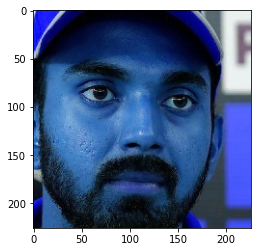

In [44]:
plt.imshow(cropped_image)

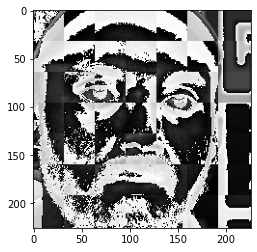

In [45]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [46]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bhuvneshwar_kumar': ['./dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar1.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar100.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar101.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar102.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar103.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar104.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar105.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar106.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar12.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar13.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar14.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar15.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar16.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar17.png',
  './dataset/cropped/bhuvneshwar_kumar\\bhuvneshw

In [47]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'bhuvneshwar_kumar': 0,
 'hardik_pandya': 1,
 'jasprit_bumrah': 2,
 'kl_rahul': 3,
 'ravindra_jadeja': 4,
 'rishabh_pant': 5,
 'rohit_sharma': 6,
 'shardul_thakur': 7,
 'virat_kohli': 8}

In [48]:
x,y=[],[]
for celebrity_name,trainng_files in celebrity_file_names_dict.items():
    for training_image in trainng_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
            
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [49]:
len(x[0])

4096

In [50]:
x[0]

array([[ 70],
       [ 70],
       [ 70],
       ...,
       [ 19],
       [255],
       [255]], dtype=uint8)

In [51]:
y[0]

0

In [52]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(720, 4096)

In [53]:
x[0]

array([ 70.,  70.,  70., ...,  19., 255., 255.])


## Model Training
We will use SVM with rbf kernel tuned with heuristic finetuning

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [56]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6333333333333333

In [57]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51        26
           1       0.67      0.60      0.63        10
           2       0.67      0.77      0.71        13
           3       0.83      0.83      0.83        30
           4       0.77      0.56      0.65        18
           5       0.62      0.38      0.48        13
           6       0.88      0.32      0.47        22
           7       0.71      0.81      0.76        21
           8       0.44      0.78      0.56        27

    accuracy                           0.63       180
   macro avg       0.68      0.62      0.62       180
weighted avg       0.68      0.63      0.63       180



## Find best model using Grid Search

In [58]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [59]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [60]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.648148,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.325926,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.690741,{'logisticregression__C': 1}


In [61]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [62]:
best_estimators['svm'].score(X_test,y_test)

0.6944444444444444

In [63]:
best_estimators['random_forest'].score(X_test,y_test)

0.4

In [64]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [65]:
print(classification_report(y_test, best_estimators['svm'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63        26
           1       1.00      0.60      0.75        10
           2       0.59      0.77      0.67        13
           3       0.78      0.83      0.81        30
           4       0.73      0.61      0.67        18
           5       0.67      0.62      0.64        13
           6       0.87      0.59      0.70        22
           7       0.71      0.81      0.76        21
           8       0.61      0.63      0.62        27

    accuracy                           0.69       180
   macro avg       0.73      0.68      0.69       180
weighted avg       0.71      0.69      0.70       180



In [66]:
print(classification_report(y_test, best_estimators['logistic_regression'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.62      0.80      0.70        10
           2       0.55      0.92      0.69        13
           3       0.82      0.77      0.79        30
           4       0.76      0.72      0.74        18
           5       0.90      0.69      0.78        13
           6       0.80      0.55      0.65        22
           7       0.75      0.86      0.80        21
           8       0.75      0.78      0.76        27

    accuracy                           0.75       180
   macro avg       0.75      0.76      0.74       180
weighted avg       0.77      0.75      0.75       180



In [67]:
best_clf = best_estimators['logistic_regression']

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[19,  0,  0,  1,  1,  0,  1,  3,  1],
       [ 0,  8,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  1, 12,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  0, 23,  1,  0,  0,  1,  2],
       [ 0,  0,  4,  0, 13,  1,  0,  0,  0],
       [ 0,  0,  2,  0,  1,  9,  0,  1,  0],
       [ 1,  1,  3,  2,  0,  0, 12,  0,  3],
       [ 0,  1,  0,  0,  1,  0,  0, 18,  1],
       [ 2,  0,  1,  2,  0,  0,  1,  0, 21]], dtype=int64)

Text(69.0, 0.5, 'Truth')

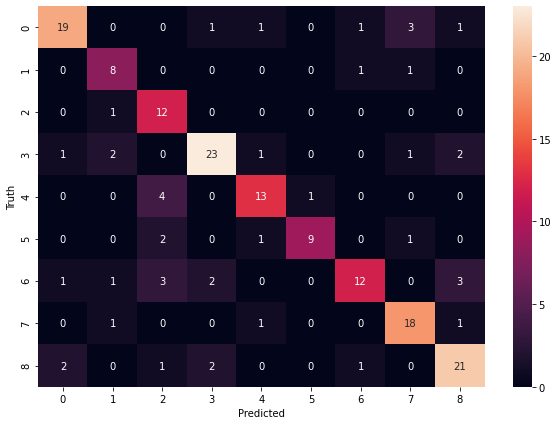

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
class_dict

{'bhuvneshwar_kumar': 0,
 'hardik_pandya': 1,
 'jasprit_bumrah': 2,
 'kl_rahul': 3,
 'ravindra_jadeja': 4,
 'rishabh_pant': 5,
 'rohit_sharma': 6,
 'shardul_thakur': 7,
 'virat_kohli': 8}

## Save the Trainned Model

In [71]:
import joblib
## save the model
joblib.dump(best_clf,'best_model_lr.pkl')

['best_model_lr.pkl']

## Save the Class Dictionary

In [72]:
import json
with open('class_dictonary.json','w') as f:
    f.write(json.dumps(class_dict))